In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("/content/Dataset .csv")

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


C:\Users\Awan\AppData\Local\Temp\ipykernel_10736\3207606595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')


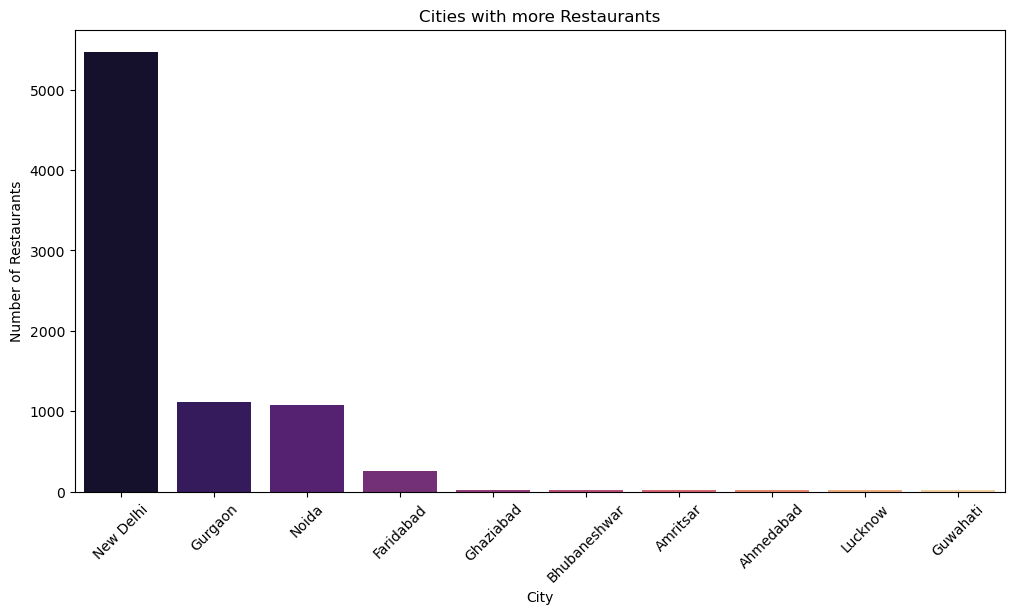

In [ ]:
plt.figure(figsize=(12, 6))
top_locations = df['City'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')
plt.title("Cities with more Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

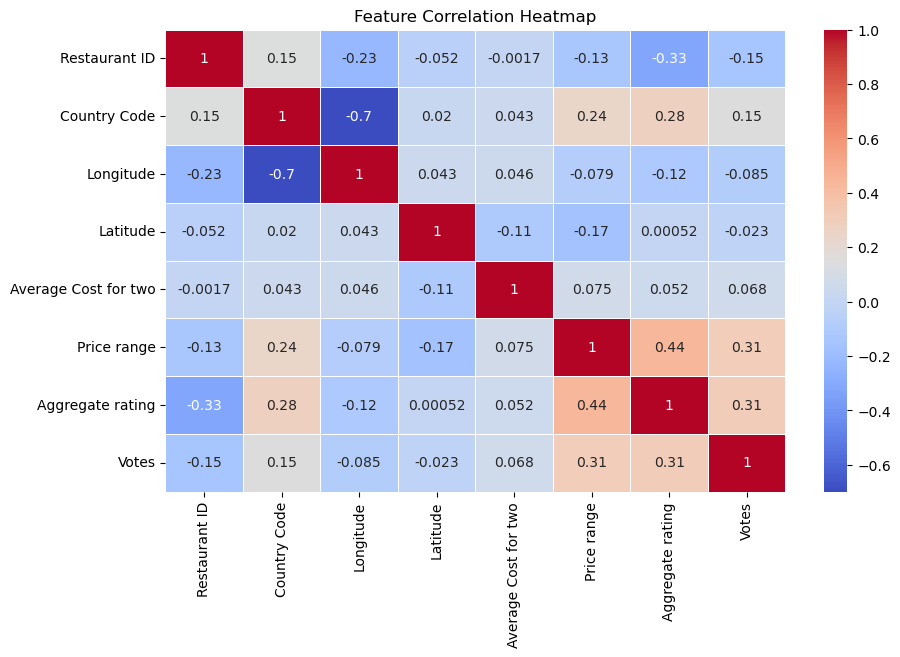

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

- Strongest Correlations
  Price Range & Aggregate Rating (0.44)
  Higher-priced restaurants tend to have higher ratings.
  Votes & Aggregate Rating (0.31)
  More votes generally lead to higher ratings.
  Price Range & Votes (0.31)
 Expensive restaurants get more votes.

- Weak or No Correlation
  Latitude & Longitude (-0.70)
  Expected since longitude and latitude are independent in different locations.
  Average Cost for Two & Aggregate Rating (0.05)
  No strong link between cost and ratings.

- Negative Correlations
Restaurant ID & Aggregate Rating (-0.33)
This may suggest newer restaurants (higher IDs) get lower ratings

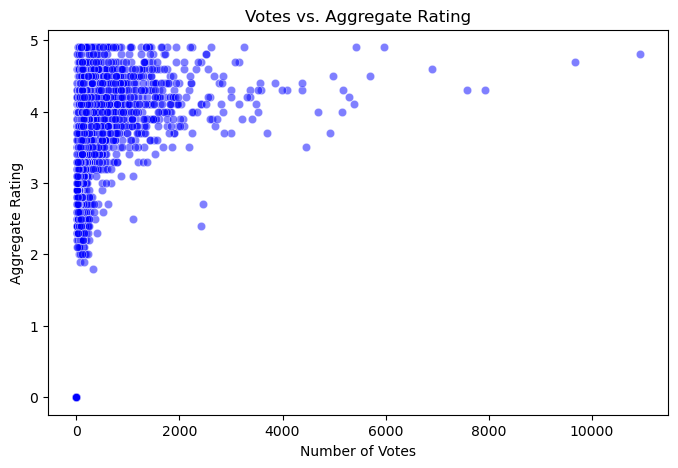

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.5, color='blue')
plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()

<ipython-input-19-f9f02352679d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df['Average Cost for two'], q=4, duplicates='drop'), y=df['Aggregate rating'], palette='coolwarm')


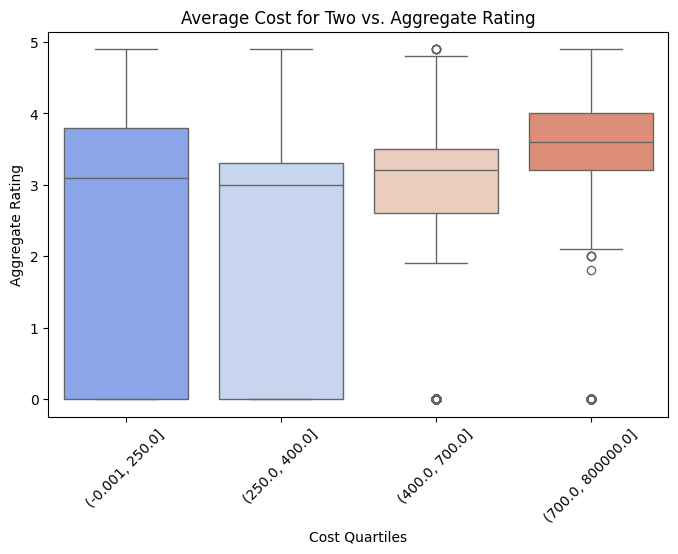

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df['Average Cost for two'], q=4, duplicates='drop'), y=df['Aggregate rating'], palette='coolwarm')
plt.title("Average Cost for Two vs. Aggregate Rating")
plt.xlabel("Cost Quartiles")
plt.ylabel("Aggregate Rating")
plt.xticks(rotation=45)
plt.show()

<Figure size 2500x600 with 0 Axes>

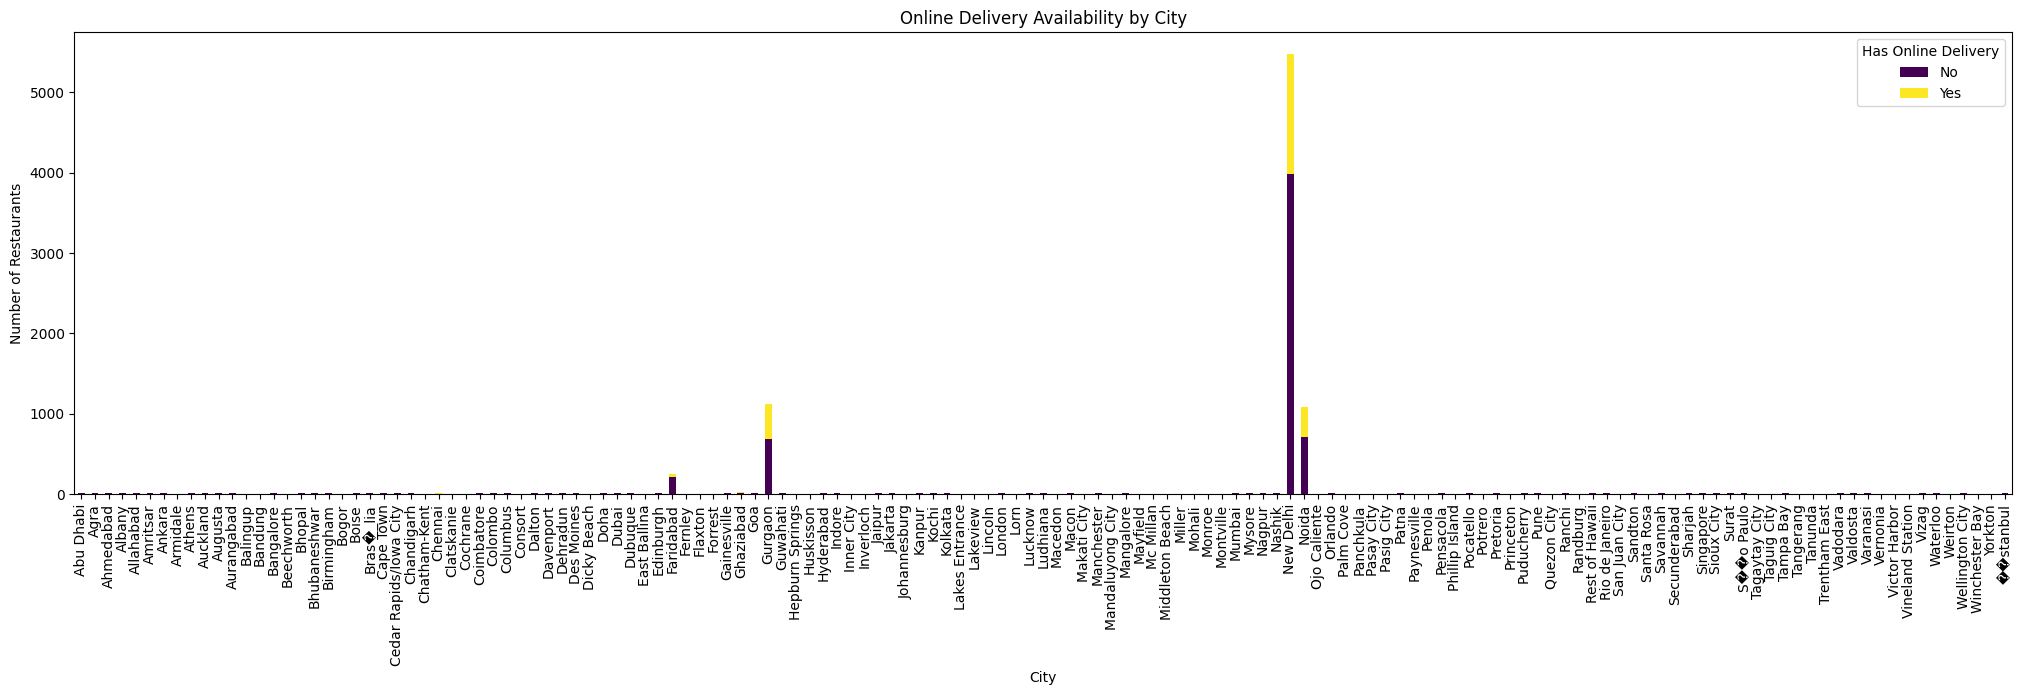

In [20]:
plt.figure(figsize=(25, 6))

delivery_counts = df.groupby('City')['Has Online delivery'].value_counts().unstack().fillna(0)
delivery_counts.plot(kind='bar', stacked=True, figsize=(25, 6), colormap='viridis')  # Adjust this as well

plt.title("Online Delivery Availability by City")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.show()

Has Online delivery    No   Yes
City                           
Abu Dhabi             9.0  11.0
Agra                 20.0   0.0
Ahmedabad            10.0  11.0
Albany               20.0   0.0
Allahabad            20.0   0.0
...                   ...   ...
Weirton               1.0   0.0
Wellington City      20.0   0.0
Winchester Bay        1.0   0.0
Yorkton               1.0   0.0
��stanbul            14.0   0.0

[141 rows x 2 columns]


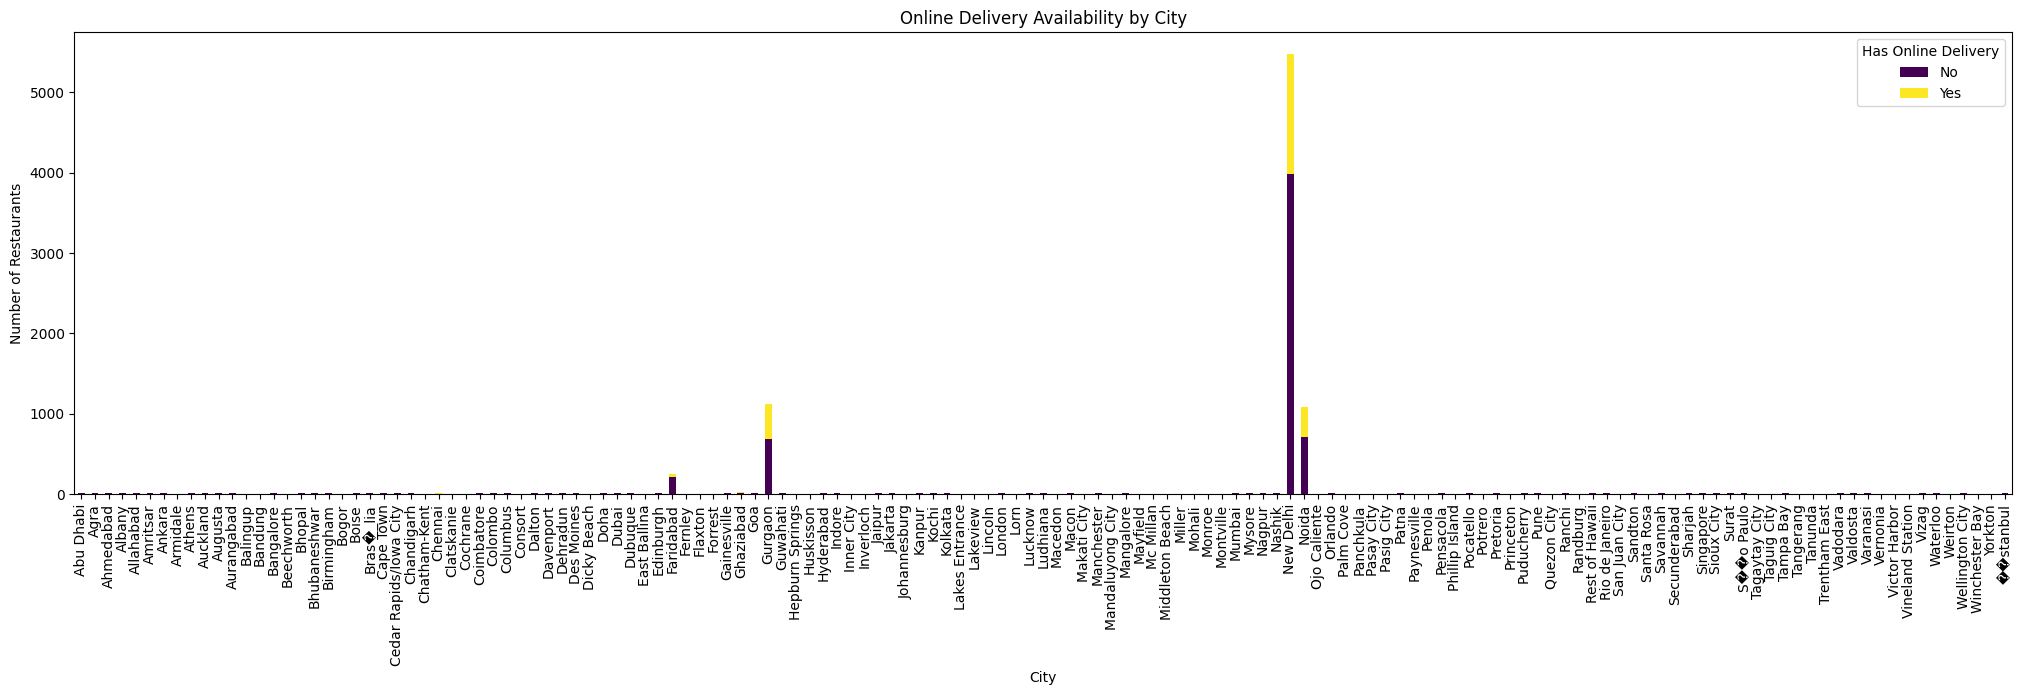

In [21]:
delivery_counts = df.groupby('City')['Has Online delivery'].value_counts().unstack().fillna(0)
print(delivery_counts)
delivery_counts.plot(kind='bar', stacked=True, figsize=(25,6), colormap='viridis')
plt.title("Online Delivery Availability by City")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.show()

C:\Users\Awan\AppData\Local\Temp\ipykernel_10736\3280965764.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette='magma')


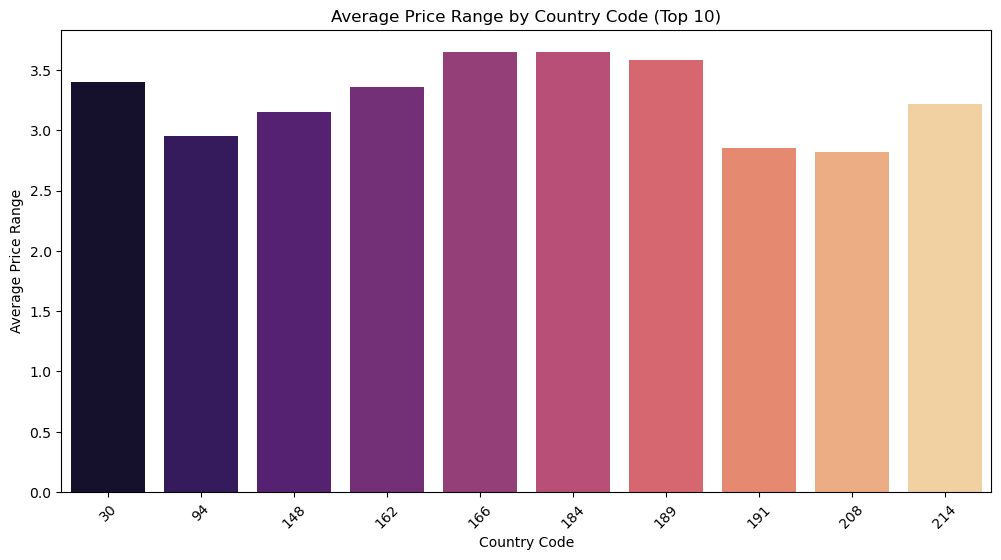

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Group by 'Country Code' and calculate the average 'Price range'
avg_price_by_country = df.groupby('Country Code')['Price range'].mean().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette='magma')

plt.title("Average Price Range by Country Code (Top 10)")
plt.xlabel("Country Code")
plt.ylabel("Average Price Range")
plt.xticks(rotation=45)
plt.show()
